<a href="https://colab.research.google.com/github/okano-tomoyuki/github_introduction/blob/master/KalmanFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

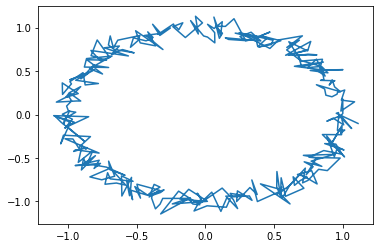

In [38]:
deltaT = 1

timesteps = np.arange(0, 360, deltaT);

sigma_v = 0.05
sigma_w = 0.05

v_x_err = np.random.normal(loc=0,scale=sigma_v,size=len(timesteps))
v_y_err = np.random.normal(loc=0,scale=sigma_v,size=len(timesteps))
w_x_err = np.random.normal(loc=0,scale=sigma_w,size=len(timesteps))
w_y_err = np.random.normal(loc=0,scale=sigma_w,size=len(timesteps))

x = np.cos(timesteps / 360 * 2 * np.pi ) + v_x_err + w_x_err
y = np.sin(timesteps / 360 * 2 * np.pi ) + v_y_err + w_y_err

plt.plot(x,y)

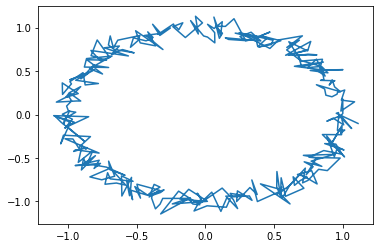

In [57]:
Y = [x,y]
Y = np.array(Y).T

In [126]:
A = np.array(
    [[1, 0, deltaT, 0, 0.5 * deltaT**2, 0],
     [0, 1, 0, deltaT, 0, 0.5 * deltaT**2],
     [0, 0, 1, 0, deltaT, 0],
     [0, 0, 0, 1, 0, deltaT],
     [0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 1]])

AT = A.T

In [127]:
X = np.array([0.1 ,0.1 , 0.1 , 0.1, 0.1, 0.1]).T
P = np.identity(6)

In [128]:
P = A @ P @ AT

In [129]:
C = np.array(
    [[1,0],
     [0,1],
     [0,0],
     [0,0],
     [0,0],
     [0,0]])

CT = C.T

In [130]:
G = P @ C @ np.linalg.inv(CT @ P @ C + sigma_w ** 2 * np.identity(2))

In [131]:
X = X + G @ (Y[0] - CT @X)

In [132]:
P = (np.identity(6) - G @ CT) @ P